In [8]:
from notion2pandas import Notion2PandasClient
import sys
sys.path.append('../../')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import constants 

n2p = Notion2PandasClient(auth=constants.NOTION_TOKEN)
notion_df = n2p.from_notion_DB_to_dataframe(constants.NOTION_DB_ID)

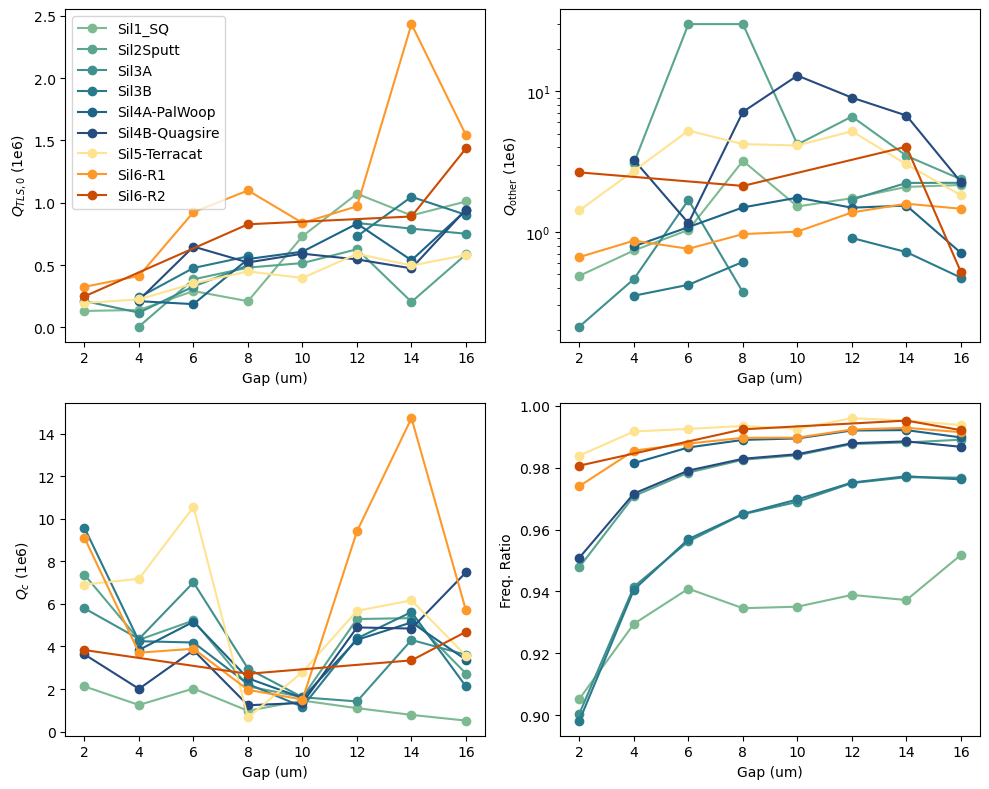

In [9]:

colors = ["#0869c8","#b51d14", '#ddb310','#658b38','#7e1e9c', '#75bbfd', '#cacaca']
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(2,2, figsize=(10,8))
ax = ax.flatten()
xval = 'Gap (um)'
#xval = 'Target Freq. (GHz)'
num_sapp = 3
num_nb_sil = 6
num_ta_sil = 3 
b1 = sns.color_palette('flare',num_sapp)
b2 = sns.color_palette('crest',num_nb_sil)
b3 = sns.color_palette('YlOrBr',num_ta_sil)
col = b1+b2+b3
i=0
num_sets = len(notion_df['Name'].unique())
for name, group in notion_df.groupby('Name'):
    if group['Substrate'].iloc[0]=='Silicon':
        group = group.sort_values(by=xval)
        #print(f"Group: {name}")
        #print(group['Gap (um)'])
        ax[0].plot(group[xval], group['QTLS0 (1e6)'], 'o-', label=name, color=col[i])
        ax[1].semilogy(group[xval], group['Qother (1e6)'], 'o-', label=name, color=col[i])
        ax[2].plot(group[xval], group['Qc (1e6)'], 'o-', label=name, color=col[i])
        ax[3].plot(group[xval], group['Freq (GHz)']/group['Target Freq. (GHz)'], 'o-', label=name, color=col[i])
        #ax[3].plot(group[xval], group['Freq (GHz)'], 'o-', label=name) 
    i+=1
ax[0].legend()
ax[0].set_ylabel('$Q_{TLS,0}$ (1e6)')
ax[1].set_ylabel('$Q_{\mathrm{other}}$ (1e6)')
ax[2].set_ylabel('$Q_{c}$ (1e6)')
ax[3].set_ylabel('Freq. Ratio')
for a in ax: 
    a.set_xlabel(xval)
fig.tight_layout()
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
fig.savefig(f"resonators_{current_time}.png")